In [78]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
wine_data = pd.read_csv("C:/Users/senth/Desktop/winequality-red.csv")
wine_data.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
from collections import Counter
Counter(wine_data['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

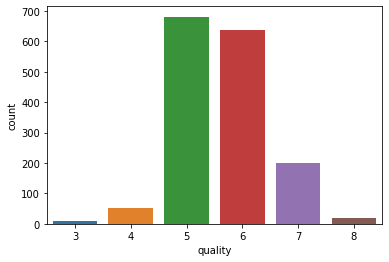

In [76]:
sns.countplot(x='quality', data=wine_data)

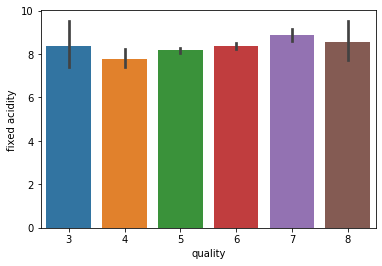

In [77]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data)

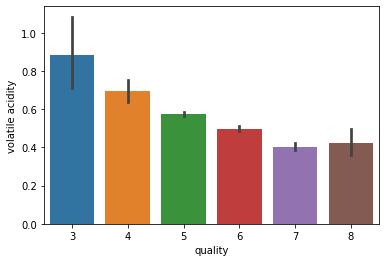

In [26]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data)

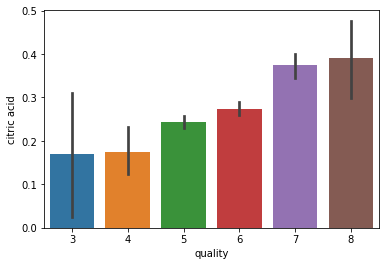

In [27]:
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data)

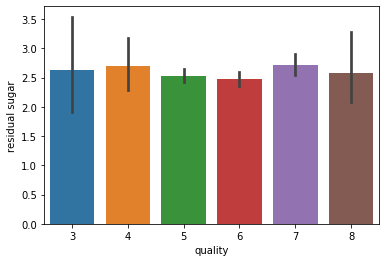

In [30]:
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_data)

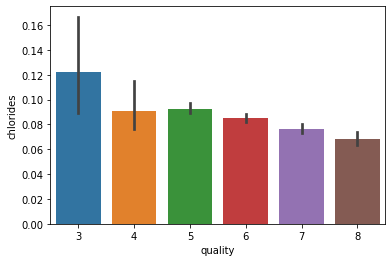

In [32]:
sns.barplot(x = 'quality', y = 'chlorides', data = wine_data)

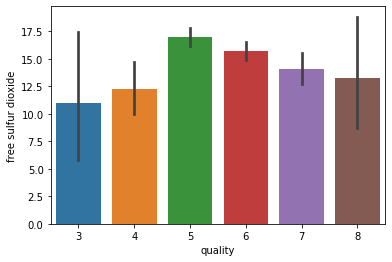

In [36]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_data)

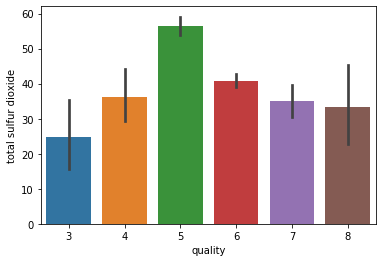

In [37]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_data)

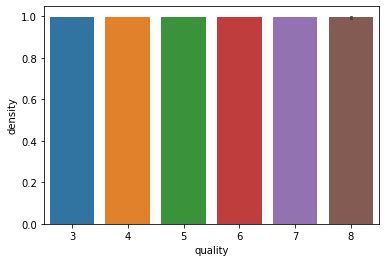

In [39]:
sns.barplot(x = 'quality', y = 'density', data = wine_data)

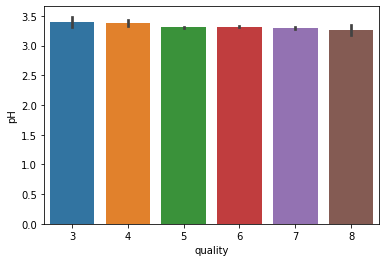

In [41]:
sns.barplot(x = 'quality', y = 'pH', data = wine_data)

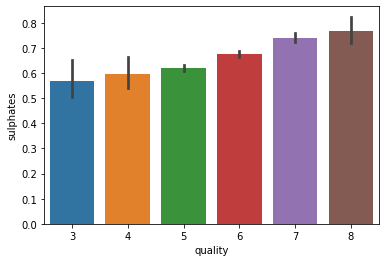

In [45]:
sns.barplot(x = 'quality', y = 'sulphates', data = wine_data)

In [57]:
evaluate_data = []
for i in wine_data['quality']:
    if i>=1 and i<=3:
        evaluate_data.append('1')
    elif i>=4 and i<=7:
        evaluate_data.append('2')
    elif i>=8 and i<=10:
        evaluate_data.append('3')
wine_data['Evaluate'] = evaluate_data 

In [58]:
from collections import Counter 
Counter(wine_data['quality'])

array(['2', '3', '1'], dtype=object)

In [60]:
wine_data['Evaluate'].unique()

array(['2', '3', '1'], dtype=object)

In [62]:
Counter(wine_data['Evaluate'])

Counter({'2': 1571, '3': 18, '1': 10})

In [67]:
x = wine_data.iloc[0:,:11]
y = wine_data['Evaluate']


In [68]:
x.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [70]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Evaluate, dtype: object

In [73]:
sl = StandardScaler()
x = sl.fit_transform(x)

In [79]:
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [81]:
pca = PCA()
x_pca = pca.fit_transform(x)

In [84]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [87]:
print(x_new)

[[-1.61952988  0.45095009 -1.77445415 ... -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...  0.40147313 -0.53955348
   0.59794606]
 ...
 [-1.45612897  0.31174559  1.12423941 ... -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ... -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ... -0.49615364  1.18913227
   0.04217568]]


In [120]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.5)

In [121]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(799, 8)
(799,)
(800, 8)
(800,)


In [122]:
log = LogisticRegression()
log.fit(x_train, y_train)
log_predict = log.predict(x_test)

C:\Users\senth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\senth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [123]:
log_conf_matrix = confusion_matrix(y_test, log_predict)
log_acc_score = accuracy_score(y_test, log_predict)
print(log_conf_matrix)
print(log_acc_score*100)

[[  0   4   0]
 [  0 783   0]
 [  0  13   0]]
97.875


In [124]:
gas = GaussianNB()
gas.fit(x_train,y_train)
gas_predict=gas.predict(x_test)

In [126]:
gas_conf_matrix = confusion_matrix(y_test, gas_predict)
gas_acc_score = accuracy_score(y_test, gas_predict)
print(gas_conf_matrix)
print(gas_acc_score*100)

[[  1   3   0]
 [  4 775   4]
 [  0  13   0]]
97.0


In [127]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)


C:\Users\senth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [129]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[  1   3   0]
 [  0 783   0]
 [  0  13   0]]
98.0


In [131]:
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)

C:\Users\senth\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [132]:
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[  1   3   0]
 [  0 783   0]
 [  0  13   0]]
98.0


In [ ]:
#Average of SVC and RFC are similar and have same accuracy.

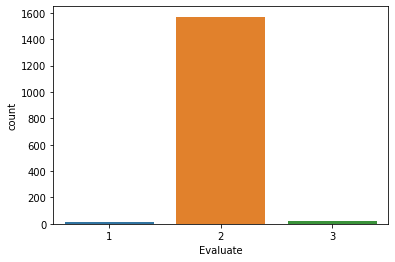

In [136]:
# 1-> bad
# 2_> average
# 3 _> good
sns.countplot(x='Evaluate', data=wine_data)

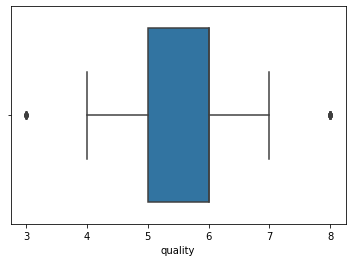

In [145]:

sns.boxplot(x='quality', data=wine_data)